In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('outliers_removed_dataset.csv')
dataset

,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Total Revenue,Total Equity,"Property Plant And Equipment, Total - Gross",Total CO2 Equivalent Emissions To Revenues USD in million,Company Market Capitalization,Revenue Per Share,P/E (Daily Time Series Ratio),returns_yearly,RIC,Year,ESG Score
0,434.373405,483.824655,718.957376,1361.504594,107.309409,1561.383359,-3.988004,817.381317,NaN,1430.561330,7.068281,19.299905,48.651108,BVIC.L,2009,51.267135
1,579.778906,580.095207,901.298414,1655.358922,139.656087,1800.699024,-48.552134,889.120843,NaN,1772.376566,8.006665,16.927900,15.557061,BVIC.L,2010,50.550242
2,598.968478,607.694345,893.154869,1660.096296,122.255528,2010.689188,35.059289,836.280911,NaN,1205.126197,7.912984,13.534436,-33.927688,BVIC.L,2011,46.732870
3,615.523874,601.137943,907.121844,1658.099764,100.765756,2030.840850,59.968319,872.046035,NaN,1603.272359,7.914423,18.363571,27.226920,BVIC.L,2012,57.941343
4,748.229068,814.064189,895.874010,1714.940377,133.919162,2133.025672,65.996482,907.653333,31.296503,2819.919676,8.716901,27.421399,56.909555,BVIC.L,2013,49.513243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17801,508.659597,499.727765,854.705053,1416.597983,-69.450488,693.963620,371.588291,1023.334713,NaN,6149.754839,0.600834,12.686354,55.963865,AKSEN.IS,2012,NaN
17802,638.000443,518.128905,832.971056,1647.877634,128.782317,1033.079508,626.158012,1144.872436,NaN,2890.147053,0.842410,NaN,-51.187365,AKSEN.IS,2013,NaN
17803,200.762211,392.510641,861.472976,1455.037986,15.103122,838.842040,413.570234,NaN,NaN,2092.518923,0.684022,NaN,-11.809025,AKSEN.IS,2015,NaN
17804,253.774022,469.697528,873.938859,1385.823907,-77.255403,790.854929,265.183882,1343.704039,NaN,2030.371303,0.644891,NaN,19.079495,AKSEN.IS,2016,NaN


In [3]:
dataset.columns

Index(['Total Current Assets', 'Total Current Liabilities', 'Total Debt',
       'Total Assets, Reported', 'Net Income - Actual', 'Total Revenue',
       'Total Equity', 'Property Plant And Equipment, Total - Gross',
       'Total CO2 Equivalent Emissions To Revenues USD in million',
       'Company Market Capitalization', 'Revenue Per Share',
       'P/E (Daily Time Series Ratio)', 'returns_yearly', 'RIC', 'Year',
       'ESG Score'],
      dtype='object')

In [4]:
# remove unnamed and direclty correlated rows from dataset
columns = ['Total Current Assets', 'Total Current Liabilities', 'Total Debt',
       'Total Assets, Reported', 'Net Income - Actual', 'Total Revenue',
       'Total Equity', 'Property Plant And Equipment, Total - Gross',
       'Total CO2 Equivalent Emissions To Revenues USD in million',
       'Company Market Capitalization', 'Revenue Per Share',
       'P/E (Daily Time Series Ratio)', 'returns_yearly', 
       'ESG Score' ]

dataset = dataset[columns]
dataset.head(5)



,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Total Revenue,Total Equity,"Property Plant And Equipment, Total - Gross",Total CO2 Equivalent Emissions To Revenues USD in million,Company Market Capitalization,Revenue Per Share,P/E (Daily Time Series Ratio),returns_yearly,ESG Score
0,434.373405,483.824655,718.957376,1361.504594,107.309409,1561.383359,-3.988004,817.381317,NaN,1430.561330,7.068281,19.299905,48.651108,51.267135
1,579.778906,580.095207,901.298414,1655.358922,139.656087,1800.699024,-48.552134,889.120843,NaN,1772.376566,8.006665,16.927900,15.557061,50.550242
2,598.968478,607.694345,893.154869,1660.096296,122.255528,2010.689188,35.059289,836.280911,NaN,1205.126197,7.912984,13.534436,-33.927688,46.732870
3,615.523874,601.137943,907.121844,1658.099764,100.765756,2030.840850,59.968319,872.046035,NaN,1603.272359,7.914423,18.363571,27.226920,57.941343
4,748.229068,814.064189,895.874010,1714.940377,133.919162,2133.025672,65.996482,907.653333,31.296503,2819.919676,8.716901,27.421399,56.909555,49.513243


In [5]:
# remove all rows which have null values for ESG score

dataset = dataset.dropna(subset=['ESG Score'])

# check null values in other columns
nullvalues_df = dataset.apply(lambda x: sum(x.isnull())).to_frame(name= 'count')
print(nullvalues_df)


# import pandas as pd
# import numpy as np
# from scipy.stats import chi2_contingency
# import missingno as msno


# # Create new binary variables for each column indicating whether the value is missing or not
# for col in dataset.columns:
#     if dataset[col].isnull().any():
#         dataset['Missing ' + col] = dataset[col].isnull().astype(int)

# # Calculate the contingency table and chi-square statistic for each pair of missingness binary variables
# for i, col1 in enumerate(dataset.columns):
#     if 'Missing' in col1:
#         for j, col2 in enumerate(dataset.columns):
#             if 'Missing' in col2 and j > i:
#                 contingency_table = pd.crosstab(dataset[col1], dataset[col2])
#                 chi2, p_value, dof, expected = chi2_contingency(contingency_table)
#                 print(f'{col1} vs {col2}: Chi-square={chi2:.2f}, p-value={p_value:.4f}')

# # Visualize the patterns of missingness in your dataset
# msno.matrix(dataset)



                                                    count
Total Current Assets                                  486
Total Current Liabilities                             486
Total Debt                                             16
Total Assets, Reported                                 16
Net Income - Actual                                   473
Total Revenue                                          16
Total Equity                                           16
Property Plant And Equipment, Total - Gross           686
Total CO2 Equivalent Emissions To Revenues USD ...   2709
Company Market Capitalization                          86
Revenue Per Share                                      37
P/E (Daily Time Series Ratio)                        1897
returns_yearly                                          0
ESG Score                                               0


array([[<AxesSubplot:title={'center':'Total Current Assets'}>,
        <AxesSubplot:title={'center':'Total Current Liabilities'}>,
        <AxesSubplot:title={'center':'Total Debt'}>,
        <AxesSubplot:title={'center':'Total Assets, Reported'}>],
       [<AxesSubplot:title={'center':'Net Income - Actual'}>,
        <AxesSubplot:title={'center':'Total Revenue'}>,
        <AxesSubplot:title={'center':'Total Equity'}>,
        <AxesSubplot:title={'center':'Property Plant And Equipment, Total - Gross'}>],
       [<AxesSubplot:title={'center':'Total CO2 Equivalent Emissions To Revenues USD in million'}>,
        <AxesSubplot:title={'center':'Company Market Capitalization'}>,
        <AxesSubplot:title={'center':'Revenue Per Share'}>,
        <AxesSubplot:title={'center':'P/E (Daily Time Series Ratio)'}>],
       [<AxesSubplot:title={'center':'returns_yearly'}>,
        <AxesSubplot:title={'center':'ESG Score'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

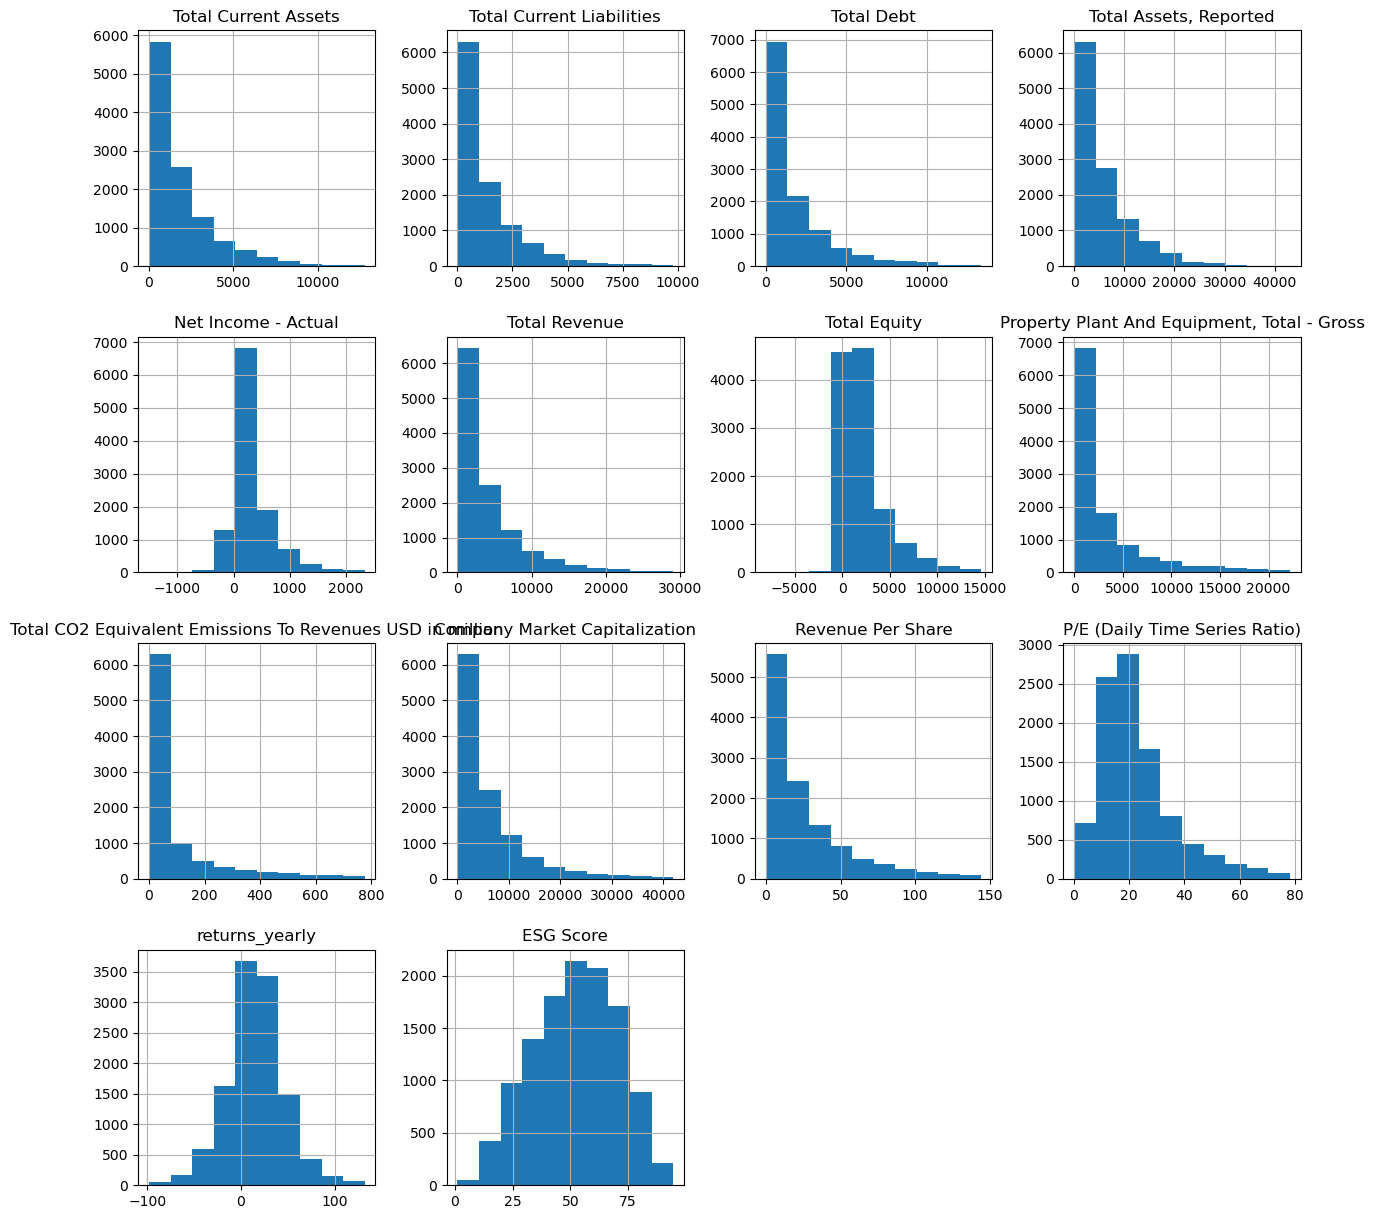

In [6]:
# check distribution of data

import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


# Plot a histogram


dataset[columns].hist( figsize=(15,15))


In [7]:
from sklearn.impute import KNNImputer


# Identify the columns with missing values
missing_cols = ['Total Current Assets', 'Total Current Liabilities','Total Debt','Total Assets, Reported','Net Income - Actual','Total Revenue','Total Equity',                                           
'Property Plant And Equipment, Total - Gross','Total CO2 Equivalent Emissions To Revenues USD in million', 'Company Market Capitalization','Revenue Per Share','P/E (Daily Time Series Ratio)']



### Removing all rows where all columns have null values (because company did not post for those years)

In [8]:
df_without_esg_ric_date = dataset[missing_cols]
# create a boolean mask of NaN values

mask = np.isnan(df_without_esg_ric_date).any(axis=1)

# select rows that do not have all NaN values
dataset = dataset[~mask]

In [9]:
# Normalize the dataset by doing Z score normalization
norm_data = (dataset - dataset.mean()) / dataset.std()

In [10]:
imputer = KNNImputer(n_neighbors=5,missing_values=np.nan)
dataset = imputer.fit_transform(dataset)

    count
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

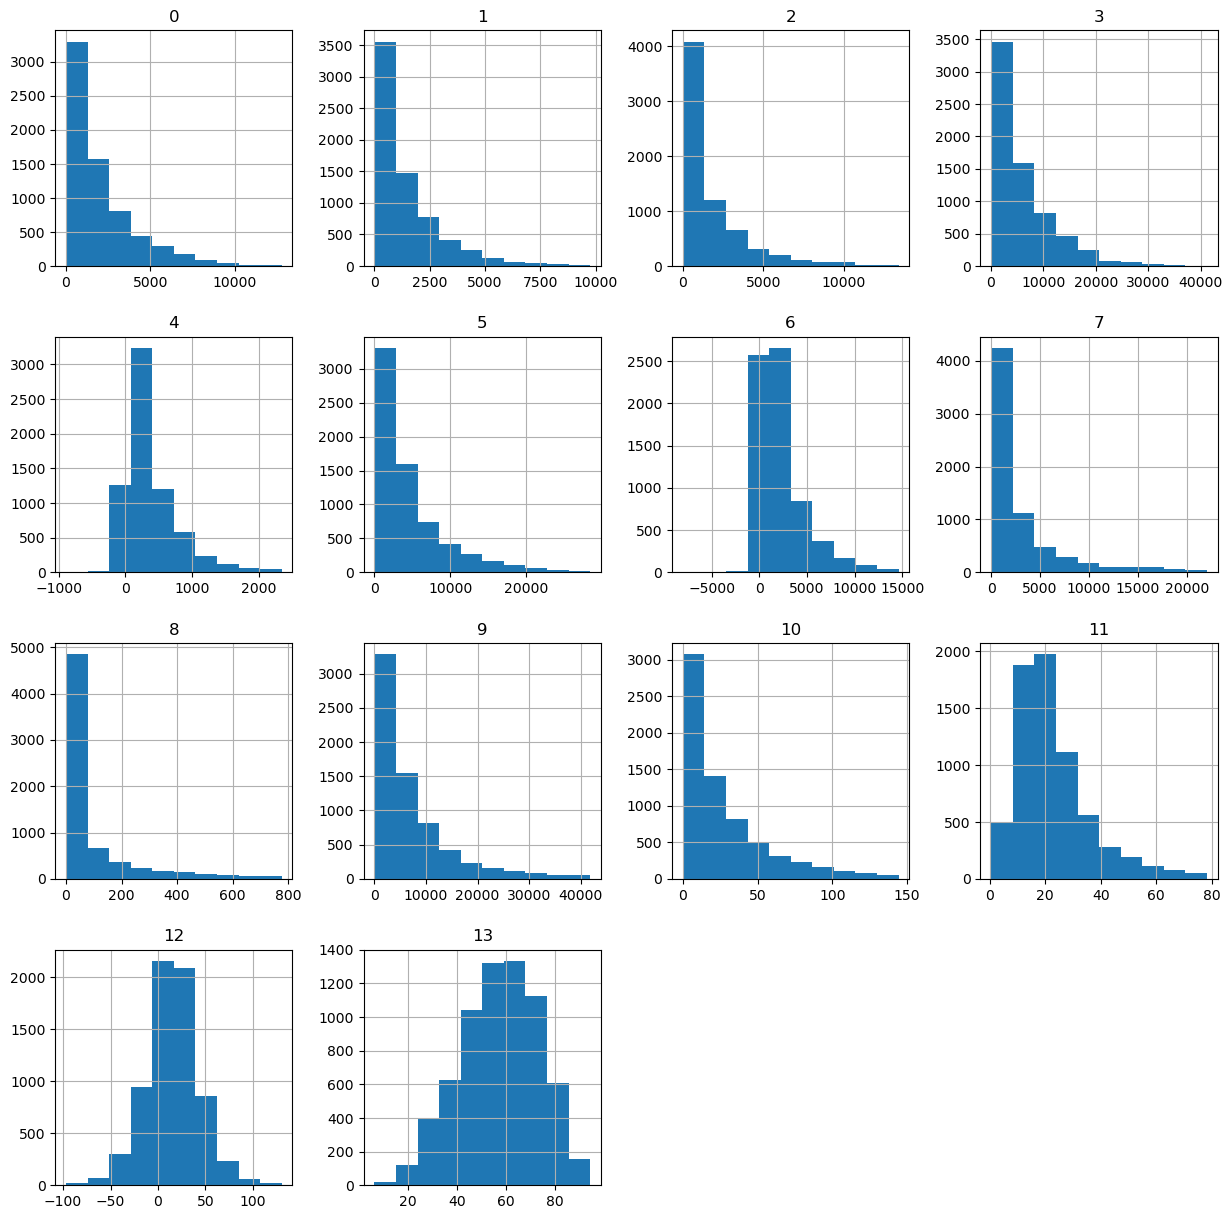

In [11]:
dataset = pd.DataFrame(dataset)

# check null values in other columns
nullvalues_df = dataset.apply(lambda x: sum(x.isnull())).to_frame(name= 'count')
print(nullvalues_df)


#export merged dataframe

dataset.to_csv('clean data.csv')

# Plot a histogram

dataset.hist( figsize=(15,15))

In [12]:
# # Split the dataset into two parts
# missing_data = dataset[dataset[missing_cols].isna().any(axis=1)]
# complete_data = dataset.dropna(subset=missing_cols)


# # Normalize the dataset by doing Z scale normalization
# norm_data = (complete_data - complete_data.mean()) / complete_data.std()

# # Create a KNN imputer object
# imputer = KNNImputer(n_neighbors=5)

# # Impute the missing values
# imputed_data = imputer.fit_transform(norm_data)

# # Convert the imputed data back to a pandas DataFrame
# imputed_df = pd.DataFrame(imputed_data, columns=complete_data.columns)




